# Visulization Tools Update 2

In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
from sompy.sompy import SOMFactory

import sklearn
import sklearn.cluster as cluster
from sklearn import preprocessing
import urllib3
from sklearn.externals import joblib
import glob
import random

import tfprop_sompy
from tfprop_sompy import tfprop_config
from tfprop_sompy import tfprop_vis
from tfprop_sompy import tfprop_analysis
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import matplotlib as mpl
import matplotlib.pyplot as plt
import images_gen
from images_gen import classify_by_group
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import pickle

CACHEDIR=C:\Users\jtz93\.matplotlib
Using fontManager instance from C:\Users\jtz93\.matplotlib\fontlist-v310.json
Loaded backend module://ipykernel.pylab.backend_inline version unknown.
Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [87]:
import warnings
warnings.filterwarnings('ignore')

In [88]:
# The CSMILES in new_compdata_class2 is errorneous but working
data = pd.read_csv(r"./data/new_compdata_class.csv").set_index("ID No.")
# "Voc","Jsc","FF","Monomer","Mw","PDI","DP","HOMO","LUMO","Bandgap"
# DP is related to Mw, and Mw is one of the most important property in OPV research
names = ["Voc (V)","Jsc (mA/cm2)","FF","Mw (kg/mol)","HOMO (eV)"] #select essential experimental factors
data.head(3)

Nickname Ref. No  PCE_max  PCE_ave  Voc (V)  Jsc (mA/cm2)    FF  \
ID No.                                                                     
1       PBTTT-C14      S1     2.34     2.34     0.53          9.37  0.48   
2          PCDTBT      S2     3.60     3.60     0.89          6.92  0.63   
3         PCPDTBT      S3     5.12     5.12     0.61         15.73  0.53   

        Mw (kg/mol)  Mn (kg/mol)   PDI  ...  aliph_num  arom_Categ  \
ID No.                                  ...                          
1              46.2         22.0  2.10  ...         30           1   
2              73.0         37.0  1.97  ...         19           2   
3              47.6         26.6  1.79  ...         19           1   

        aliph_Categ  n5Ring_Categ   chain1   chain2  number_chains  naRing.1  \
ID No.                                                                         
1                 1             2  [0, 14]  [14, 0]              2         4   
2                 2             2      [8]      [9]              1         7   
3                 1             2   [2, 2]   [7, 6]              2         4   

        naRingbyChain chain_sum  
ID No.                           
1                   2        14  
2                   7        17  
3                   2         8  

[3 rows x 1545 columns]

In [89]:
df = data[names]
df.columns = names
df2 = df.as_matrix()
df.head(5)

Voc (V)  Jsc (mA/cm2)    FF  Mw (kg/mol)  HOMO (eV)
ID No.                                                     
1          0.53          9.37  0.48         46.2       5.10
2          0.89          6.92  0.63         73.0       5.50
3          0.61         15.73  0.53         47.6       5.30
4          0.77         18.40  0.74         93.7       5.34
5          0.77         18.20  0.74         52.9       5.20

In [4]:
# load the trained sm to perform clustering
# pickle.dump(sm, open("sm_13by13","wb"))
sm = pickle.load(open("sm_HOMO_Mw","rb"))

In [5]:
# open up SMILES info file and unpickle it
with open("./data/test.txt", "rb") as fp:   # Unpickling
    b = pickle.load(fp)

In [6]:
# index is the label
labels = list(df.index)
n_clusters = 4
cmap = plt.get_cmap("tab20")

findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=semibold:stretch=normal:size=15.0.
findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.24
findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymReg.ttf) normal normal regular normal>) = 10.24
findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal bold normal>) = 11.145
findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.24
findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.24
findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 1.24
findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>) = 11.24
findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymBol.ttf) normal normal bold normal>) = 10.145
findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal regular normal>) = 10.24
findfont: score(<Font 'STIXS

findfont: score(<Font 'Cambria' (cambriai.ttf) italic normal 400 normal>) = 11.24
findfont: score(<Font 'Malgun Gothic' (malgun.ttf) normal normal 400 normal>) = 10.24
findfont: score(<Font 'Courant' (CON_____.ttf) normal normal 400 normal>) = 10.24
findfont: score(<Font 'Courant' (COO_____.ttf) italic normal 400 normal>) = 11.24
findfont: score(<Font 'ESSTIXOne' (ESSTIX1_.TTF) normal normal 400 normal>) = 10.24
findfont: score(<Font 'Cambria' (cambriab.ttf) normal normal bold normal>) = 10.145
findfont: score(<Font 'Gill Sans Ultra Bold Condensed' (GILLUBCD.TTF) normal normal bold condensed>) = 10.344999999999999
findfont: score(<Font 'Rockwell' (ROCKI.TTF) italic normal 400 normal>) = 11.24
findfont: score(<Font 'Segoe UI' (segoeuii.ttf) italic normal 400 normal>) = 11.24
findfont: score(<Font 'Bodoni MT' (BOD_I.TTF) italic normal 400 normal>) = 11.24
findfont: score(<Font 'Corbel' (corbelz.ttf) italic normal bold normal>) = 11.145
findfont: score(<Font 'CSD16' (csd16.ttf) normal nor

findfont: score(<Font 'Candara' (Candara.ttf) normal normal 400 normal>) = 10.24
findfont: score(<Font 'Symbol' (symbol.ttf) normal normal 400 normal>) = 10.24
findfont: score(<Font 'Goudy Stout' (GOUDYSTO.TTF) normal normal 400 normal>) = 10.24
findfont: score(<Font 'Segoe UI' (seguibli.ttf) italic normal black normal>) = 11.335
findfont: score(<Font 'HoloLens MDL2 Assets' (holomdl2.ttf) normal normal 400 normal>) = 10.24
findfont: score(<Font 'Arial' (ariblk.ttf) normal normal black normal>) = 6.698636363636363
findfont: score(<Font 'Yu Gothic' (YuGothB.ttc) normal normal bold normal>) = 10.145
findfont: score(<Font 'Matura MT Script Capitals' (MATURASC.TTF) normal normal 400 normal>) = 10.24
findfont: score(<Font 'STSong' (STSONG.TTF) normal normal 400 normal>) = 10.24
findfont: score(<Font 'Leelawadee UI' (LeelawUI.ttf) normal normal 400 normal>) = 10.24
findfont: score(<Font 'Colonna MT' (COLONNA.TTF) normal normal 400 normal>) = 10.24
findfont: score(<Font 'Perpetua' (PERB____.TT

findfont: score(<Font 'Wingdings' (wingding.ttf) normal normal 400 normal>) = 10.24
findfont: score(<Font 'MingLiU-ExtB' (mingliub.ttc) normal normal 400 normal>) = 10.24
findfont: score(<Font 'DejaVu Sans' (DejaVuSansCondensed-BoldOblique.ttf) oblique normal bold condensed>) = 1.345
findfont: score(<Font 'Constantia' (constan.ttf) normal normal 400 normal>) = 10.24
findfont: score(<Font 'Modern No. 20' (MOD20.TTF) normal normal 400 normal>) = 10.24
findfont: score(<Font 'Constantia' (constanb.ttf) normal normal bold normal>) = 10.145
findfont: score(<Font 'ESSTIXSeven' (ESSTIX7_.TTF) normal normal 400 normal>) = 10.24
findfont: score(<Font 'Courier New' (courbi.ttf) italic normal bold normal>) = 11.145
findfont: score(<Font 'ESSTIXThree' (ESSTIX3_.TTF) normal normal 400 normal>) = 10.24
findfont: score(<Font 'Californian FB' (CALIFB.TTF) normal normal bold normal>) = 10.145
findfont: score(<Font 'jdiconfontA' (jdiconfontA.TTF) normal normal 400 normal>) = 10.24
findfont: score(<Font '

findfont: score(<Font 'Bauhaus 93' (BAUHS93.TTF) normal normal 400 normal>) = 10.24
findfont: score(<Font 'Malgun Gothic' (malgunbd.ttf) normal normal bold normal>) = 10.145
findfont: score(<Font 'Myanmar Text' (mmrtextb.ttf) normal normal bold normal>) = 10.145
findfont: score(<Font 'Calibri' (calibrii.ttf) italic normal 400 normal>) = 11.24
findfont: score(<Font 'Arial' (ARIALNI.TTF) italic normal 400 condensed>) = 7.803636363636364
findfont: score(<Font 'Bookman Old Style' (BOOKOS.TTF) normal normal book normal>) = 10.24
findfont: score(<Font 'Microsoft PhagsPa' (phagspab.ttf) normal normal bold normal>) = 10.145
findfont: score(<Font 'Playbill' (PLAYBILL.TTF) normal normal 400 normal>) = 10.24
findfont: score(<Font 'ESSTIXNine' (ESSTIX9_.TTF) normal normal 400 normal>) = 10.24
findfont: score(<Font 'Roboto' (Roboto-Black.ttf) normal normal black normal>) = 10.335
findfont: score(<Font 'Cambria' (cambria.ttc) normal normal 400 normal>) = 10.24
findfont: score(<Font 'Wingdings 3' (WI

findfont: score(<Font 'Yu Gothic' (YuGothR.ttc) normal normal regular normal>) = 10.24
findfont: score(<Font 'Gloucester MT Extra Condensed' (GLECB.TTF) normal normal 400 condensed>) = 10.44
findfont: score(<Font 'Times New Roman' (timesbd.ttf) normal normal roman normal>) = 10.145
findfont: score(<Font 'MS Outlook' (OUTLOOK.TTF) normal normal 400 normal>) = 10.24
findfont: score(<Font 'Elephant' (ELEPHNT.TTF) normal normal 400 normal>) = 10.24
findfont: score(<Font 'icon-large' (icon-large.ttf) normal normal 400 normal>) = 10.24
findfont: score(<Font 'Calibri' (calibri.ttf) normal normal 400 normal>) = 10.24
findfont: score(<Font 'icon-ui' (icon-ui.ttf) normal normal 400 normal>) = 10.24
findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=semibold:stretch=normal:size=15.0 to DejaVu Sans ('C:\\Users\\jtz93\\Anaconda3\\envs\\SOMenv\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans-Bold.ttf') with score of 0.145000.


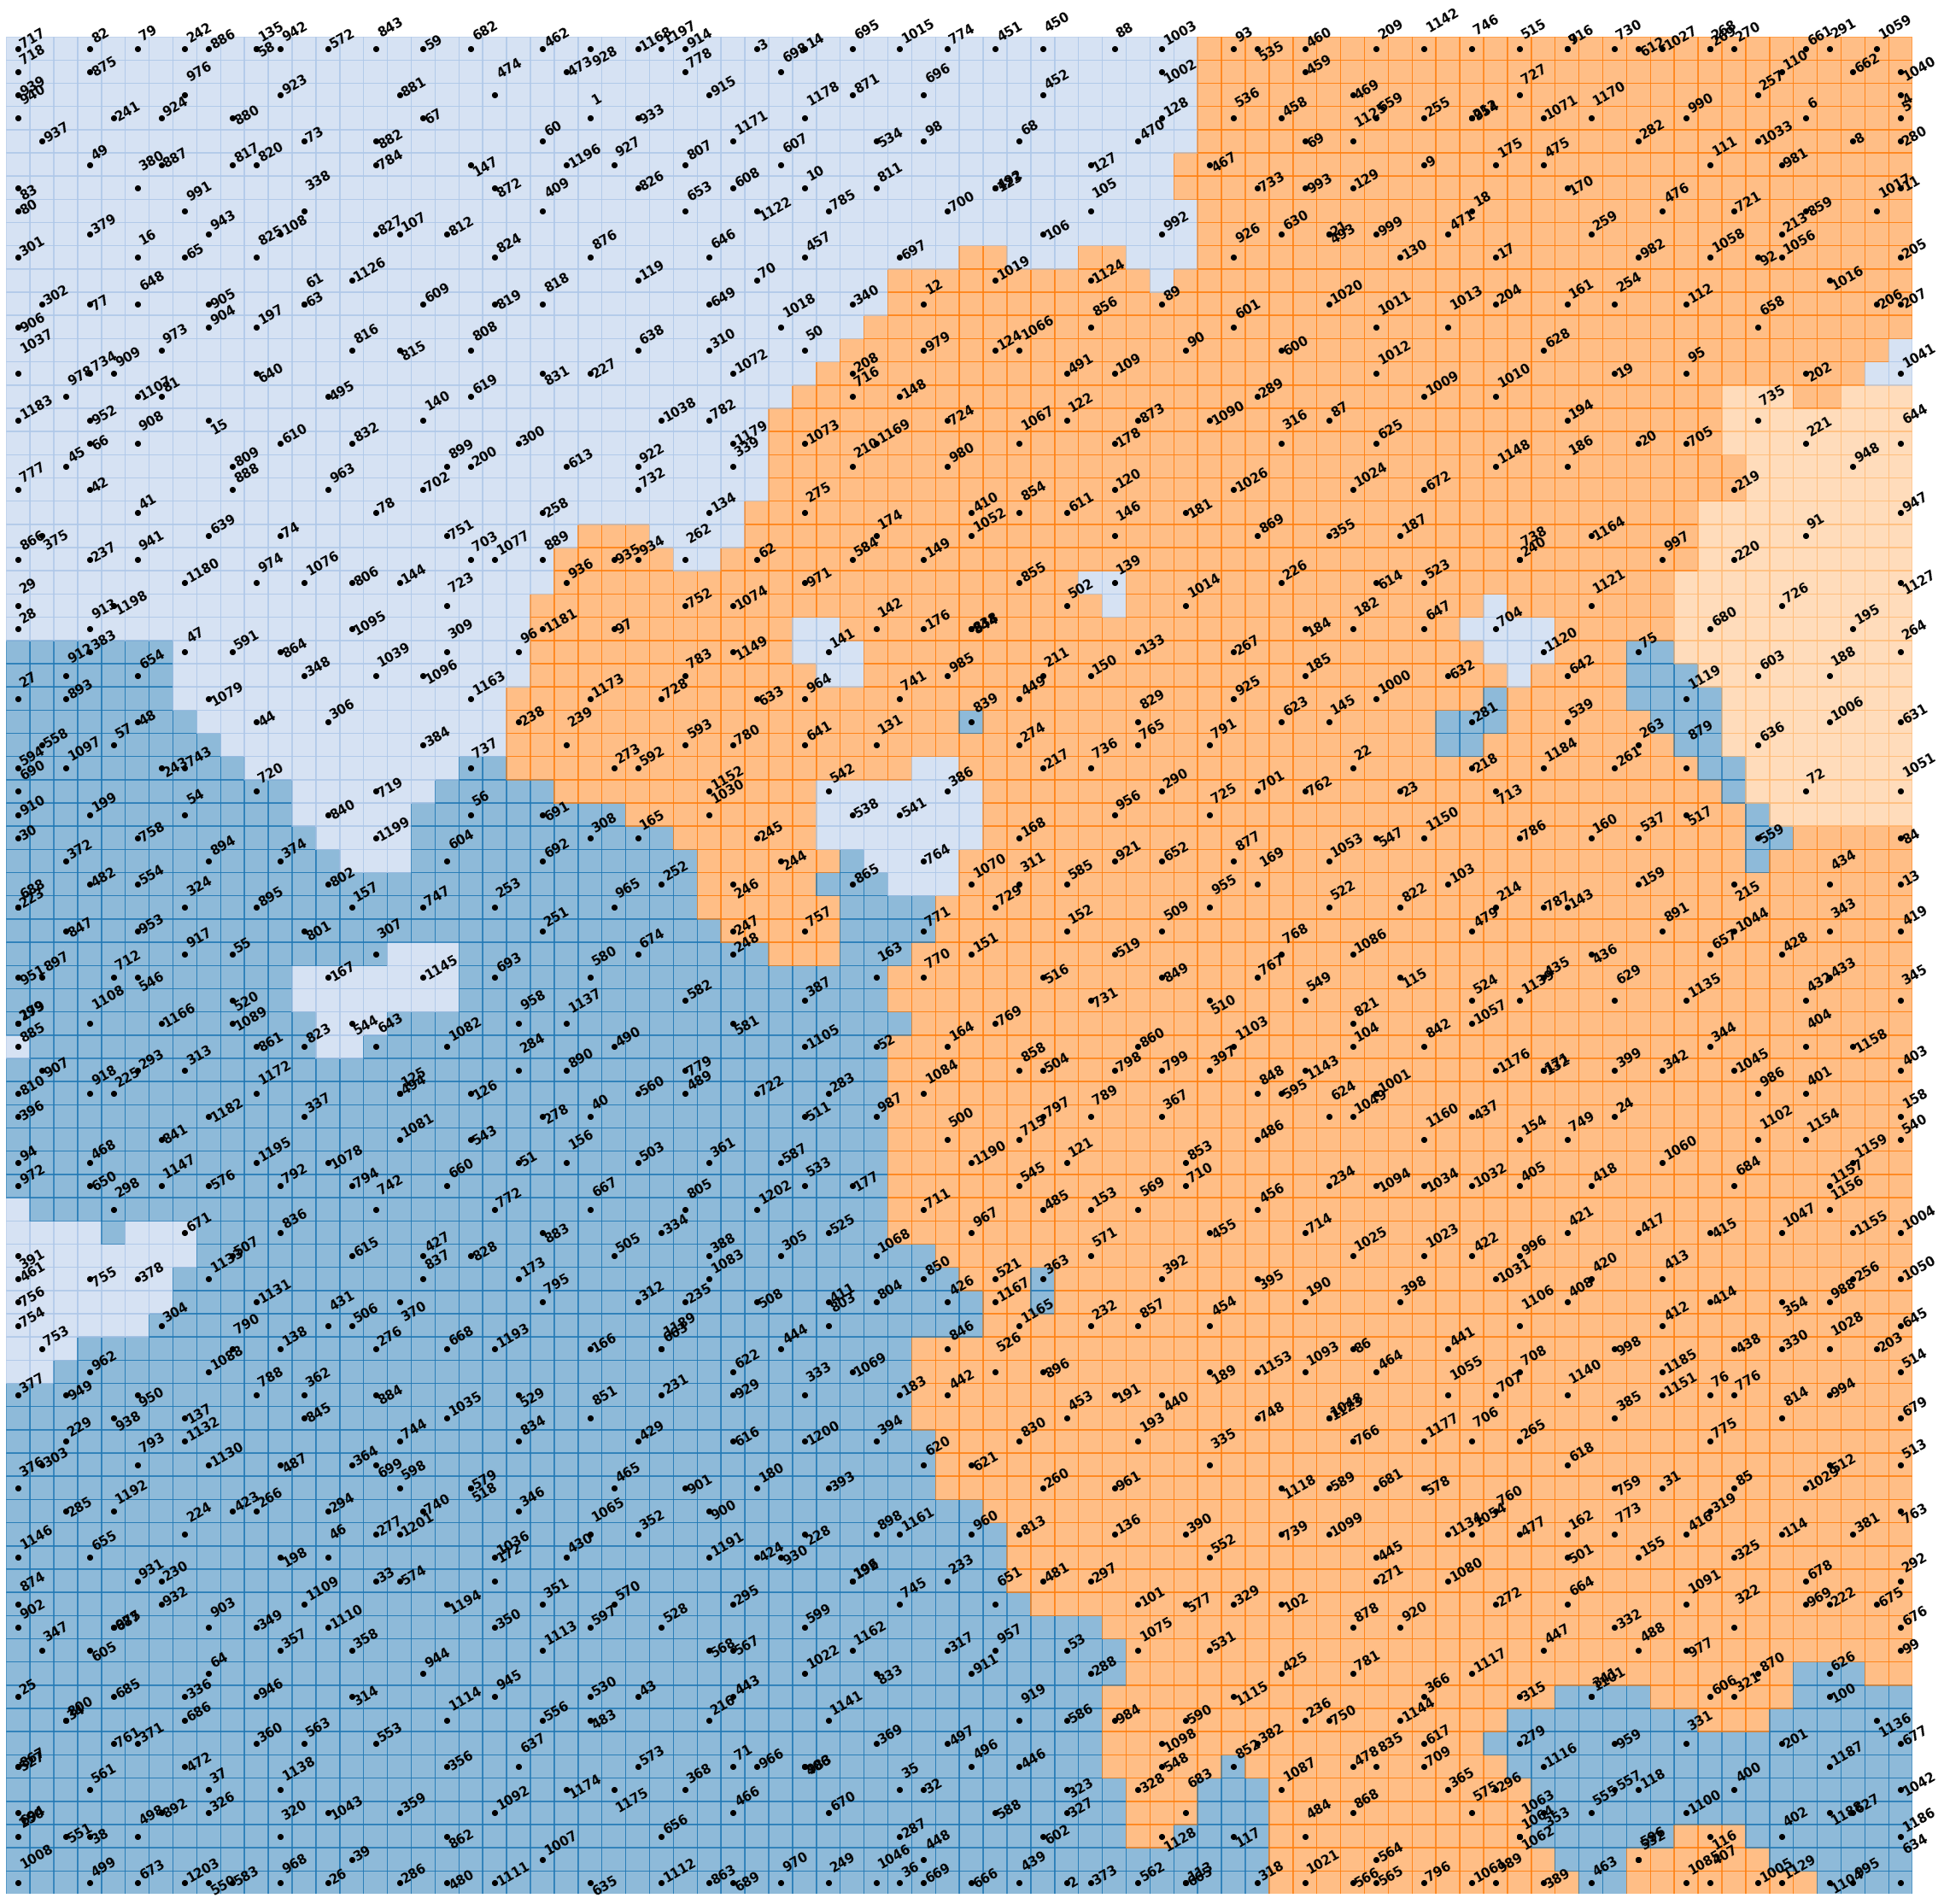

In [7]:
n_clusters = 4

cmap = plt.get_cmap("tab20")
n_palette = 20  # number of different colors in this color palette
color_list = [cmap((i % n_palette)/n_palette) for i in range(n_clusters)]
msz = sm.codebook.mapsize
proj = sm.project_data(sm.data_raw)
coord = sm.bmu_ind_to_xy(proj)

fig, ax = plt.subplots(1, 1, figsize=(40,40))

#cl_labels = som.cluster(n_clusters)
cl_labels = sklearn.cluster.KMeans(n_clusters = n_clusters, 
                                   random_state = 555).fit_predict(sm.codebook.matrix)

# fill each rectangular unit area with cluster color
# and draw line segment to the border of cluster
norm = mpl.colors.Normalize(vmin=0, vmax=n_palette, clip=True)

# borders
ax.pcolormesh(cl_labels.reshape(msz[0], msz[1]).T % n_palette,
            cmap=cmap, norm=norm, edgecolors='face',
            lw=0.5, alpha=0.5)

ax.scatter(coord[:, 0]+0.5, coord[:, 1]+0.5, c='k', marker='o')
ax.axis('off')

for label, x, y in zip(labels, coord[:, 0], coord[:, 1]):
    x += 0.2
    y += 0.2
    # "+ 0.1" means shift of label location to upperright direction

    # randomize the location of the label not to be overwrapped with each other
    # x_text += 0.1 * np.random.randn()
    y += 0.3 * np.random.randn()

    # wrap of label for chemical compound
    # label = str_wrap(label)

    ax.text(x+0.3, y+0.3, label,
            horizontalalignment='left', verticalalignment='bottom',
            rotation=30, fontsize=15, weight='semibold')

# plt.savefig('Images/cluster/cluster_HOMO_Mw.png')

In [8]:
def clusteringmap_category(sm,n_clusters,dataset,colorcategory,savepath):
    """
    Description:
    This function is used to output maps that prints colors on dots based
    on their properties
    """
    categories = dataset[colorcategory] #if colorcategory is one col of the dataset
    cmap = plt.get_cmap("tab20") #cmap for background
    n_palette = 20  # number of different colors in this color palette
    color_list = [cmap((i % n_palette)/n_palette) for i in range(n_clusters)]
    msz = sm.codebook.mapsize
    proj = sm.project_data(sm.data_raw)
    coord = sm.bmu_ind_to_xy(proj)

    fig, ax = plt.subplots(1, 1, figsize=(30,30))

    cl_labels = sklearn.cluster.KMeans(n_clusters=n_clusters,random_state=555).fit_predict(sm.codebook.matrix)
        
    # fill each rectangular unit area with cluster color
    # and draw line segment to the border of cluster
    norm = mpl.colors.Normalize(vmin=0, vmax=n_palette, clip=True)
    # ax.pcolormesh(cl_labels.reshape(msz[0], msz[1]).T % n_palette,
        # cmap=cmap, norm=norm, edgecolors='face',
        # lw=0.5, alpha=0.5)

    ax.scatter(coord[:, 0]+0.5, coord[:, 1]+0.5, c='k', marker='o')
    ax.axis('off')

    categoryname = list(dataset.groupby(colorcategory).count().index)
    categories_int = categories.apply(categoryname.index)

    N = len(categoryname)
    cmap_labels = plt.cm.gist_ncar
    # extract all colors from the .jet map
    cmaplist = [cmap_labels(i) for i in range(cmap_labels.N)]
    # create the new map
    cmap_labels = cmap_labels.from_list('Custom cmap', cmaplist, cmap_labels.N)
    # define the bins and normalize
    bounds = np.linspace(0,N,N+1)
    norm_labels = mpl.colors.BoundaryNorm(bounds, cmap_labels.N)

    scat = ax.scatter(coord[:, 0]+0.5, coord[:, 1]+0.5, c=categories_int,s=300,cmap=cmap_labels,norm=norm_labels)
    cbar = plt.colorbar(scat, spacing='proportional',ticks=bounds)
    cbar.ax.get_yaxis().set_ticks([])
    
    for j, lab in enumerate(categoryname):
        cbar.ax.text(1, (2 * j + 1) / (2*(len(categoryname))), lab, ha='left', va='center', fontsize=30)
    cbar.ax.get_yaxis().labelpad = 15
    # cbar.ax.set_ylabel('# of contacts', rotation=270)
    ax.axis('off')

    for x, y in zip(coord[:, 0], coord[:, 1]):
        x += 0.2
        y += 0.2
        
        # "+ 0.1" means shift of label location to upperright direction
        # randomize the location of the label
        #   not to be overwrapped with each other
        # x_text += 0.1 * np.random.randn()
        y += 0.3 * np.random.randn()

        # wrap of label for chemical compound
        #label = str_wrap(label)

    # ax.text(x+0.3, y+0.3,horizontalalignment='left', verticalalignment='bottom',rotation=30, fontsize=12, weight='semibold')
    # cl_labels = som.cluster(n_clusters)
    cl_labels = sklearn.cluster.KMeans(n_clusters = n_clusters, 
                                       random_state = 555).fit_predict(sm.codebook.matrix)

    for i in range(len(cl_labels)):
        rect_x = [i // msz[1], i // msz[1],
                i // msz[1] + 1, i // msz[1] + 1]
        rect_y = [i % msz[1], i % msz[1] + 1,
                i % msz[1] + 1, i % msz[1]]

        if i % msz[1] + 1 < msz[1]:  # top border
            if cl_labels[i] != cl_labels[i+1]:
                ax.plot([rect_x[1], rect_x[2]],
                        [rect_y[1], rect_y[2]], 'k-', lw=2.5)

        if i + msz[1] < len(cl_labels):  # right border
            if cl_labels[i] != cl_labels[i+msz[1]]:
                ax.plot([rect_x[2], rect_x[3]],
                        [rect_y[2], rect_y[3]], 'k-', lw=2.5)

    plt.savefig(savepath)
    return cl_labels

In [9]:
def sort_by_range(data, min_val, max_val, prop, Categ):
    """
    This function gives values between min and max as 0
    values outside as 1
    """
    ls = []
    df_categ = data[Categ]
    for i in range(len(data[prop])):
        if max_val >= data[prop].iloc[i] >= min_val:
            df_categ.iloc[i] = 0
        else:
            df_categ.iloc[i]  = 1
        ls.append(df_categ.iloc[i])
    return ls

In [10]:
ind = data.index
b = b.set_index(ind)

In [11]:
# read it as a list
chain1 = b['chain1']
chain2 = b['chain2']

In [12]:
data['chain1b'] = chain1
data['chain2b'] = chain2
# data['chain_num2b'] = b['number_chains']

### Two missions

1. Categorize chians into branch and linear
2. linear chain --> 6 - 16 atom
3. branch chain --> 


In [13]:
# chain1 and chain2
chain1 = data['chain1b']
chain2 = data['chain2b']

ID No.
1                   [0, 14]
2                       [8]
3                    [2, 2]
4                    [8, 8]
5                    [8, 8]
6                    [8, 8]
7                    [8, 8]
8                    [8, 8]
9                 [0, 2, 2]
10                   [2, 2]
11                 [10, 10]
12                [2, 5, 2]
13                 [10, 10]
14                      [0]
15                  [0, 12]
16                  [0, 12]
17                [2, 2, 2]
18                [2, 2, 2]
19                [2, 2, 2]
20                [2, 2, 2]
21                [2, 2, 2]
22                   [6, 6]
23                   [6, 6]
24                   [6, 6]
25                     [10]
26                      [9]
27                      [9]
28                [8, 8, 9]
29                [8, 8, 9]
30                   [6, 9]
               ...         
1174         [0, 10, 10, 0]
1175                 [8, 8]
1176           [0, 9, 2, 2]
1177           [0, 9, 2, 2]
1178        [

Determine the location of branch and length of it while summing branches together to see the effect of the total length of a side chain on PCE

In [14]:
def branch_total_length(data,chain):
    """
    :data pandas dataframe
    This function is used to output 
    """
    # chain1 = data['chain1b']
    # chain2 = data['chain2b']
    # sum_all = chain1 + chain2 # sum of two chains
    chain = data[chain]
    
    ls = [] # list that dictates branch and nonbranch location
    
    for each in chain:
        # nonzero index for component in sum_all
        nonzero = [i for i, e in enumerate(each) if e != 0]
        for i in nonzero:
            each[i] = 1
        # ls
        ls.append(each)
    return ls

Find the total sum of each side chain = main chain + branched chain using the following function

In [17]:
chani1 = data['chain1b']
chain2 = data['chain2b']

In [18]:
def Sum(ls1, ls2):
    res = []
    # ls1 and ls2 has the same length
    for i in range(len(ls1)):
        res.append(ls1[i] + ls2[i])
    return res

def total_length(data):
    """
    This function is used to find the total sum length of each side chain
    """
    chain1 = data['chain1b']
    chain2 = data['chain2b']
    res = []
    
    for i in range(1,len(chain1)+1):
        res.append(Sum(chain1[i],chain2[i]))
    return res

In [19]:
sum_data = total_length(data)
data['chain_sum'] = sum_data

### The next step is to extract linear and branch

In [22]:
def find_linear(ls1,ls2):
    linear = []
    branch = []
    # ls1 and ls2 has the same length
    for i in range(len(ls1)):
        if ls1[i] == 0 or ls2[i] == 0:
            l = ls1[i] + ls2[i]
            linear.append(l)
        else:
            b = ls1[i] + ls2[i]
            branch.append(b)
    
    return [len(linear),len(branch)]

In [23]:
l = find_linear([7,6,0,0],[2,2,8,9])
l

[2, 2]

In [24]:
def branch_length(data):
    """
    This function is used to find the total sum length of each side chain
    """
    chain1 = data['chain1b']
    chain2 = data['chain2b']
    res = []
    for i in range(1,len(chain1)+1):
        res.append(find_linear(chain1[i],chain2[i]))
    return res

In [25]:
linear_branch = branch_length(data) # returns linear - branch pair 
data["linear"] = pd.DataFrame(linear_branch).set_index(ind)[0]
data["branch"] = pd.DataFrame(linear_branch).set_index(ind)[1]

From Impact of **Polymer Side Chain Modification on OPV Morphology and Performance** 
https://pubs-rsc-org.offcampus.lib.washington.edu/en/content/articlepdf/2018/py/c8py00820e we know that for PBDTTPD-backbone polymer we can have the optimized structure with 2EH/C8 combination.

In our case it is better to visualize 

1. The combination (2/7 + 8/0 (2EH/C8), EO5 or else)
2. The length of each side chain (linear / branch) --> not accurate
3. Building a dataframe that incorporates min - max side chain and SOM train it

In [27]:
data['PCE_Categ'] = classify_by_group(data,"PCE_ave",5)

In [90]:
data['linear_Categ'] = classify_by_group(data,"linear",5)
clusteringmap_category(sm,4,data,"linear_Categ",'./Images/descriptors/Mw_HOMO/linear_Categ.png')

KeyError: 'linear'

locator: <matplotlib.ticker.FixedLocator object at 0x00000253A9550DA0>
Using fixed locator on colorbar
Setting pcolormesh


array([0, 0, 0, ..., 2, 2, 2])

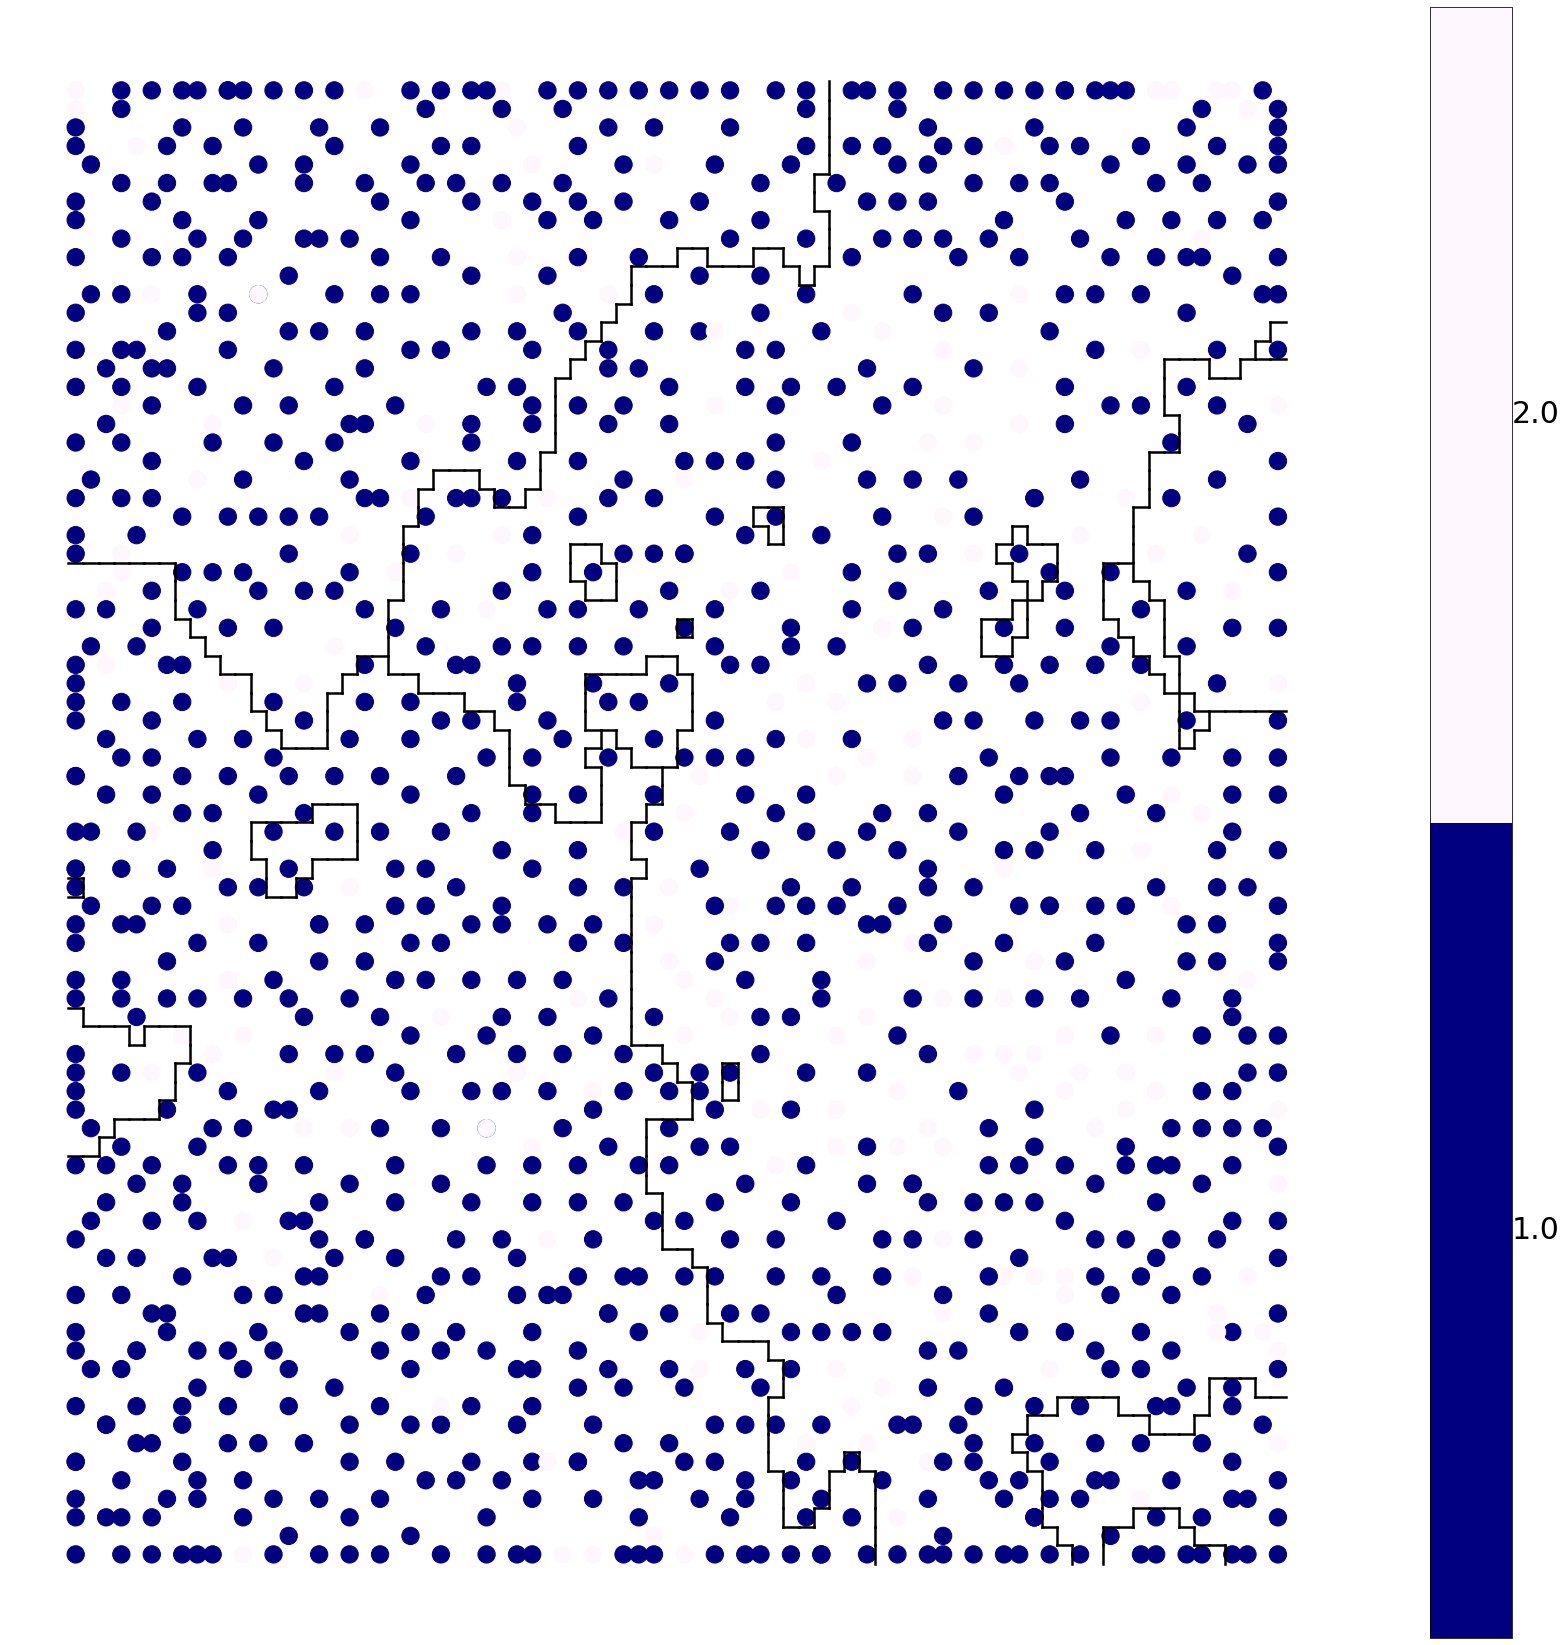

In [31]:
data['branch_Categ'] = classify_by_group(data,"branch",2)
clusteringmap_category(sm,4,data,"branch_Categ",'./Images/descriptors/Mw_HOMO/branch_Categ.png')

## Making a dataframe for chain info

* The range of side chains varies from 1 - 8
* The range of thiophene rings between 4 - 9
* focus on chain length 3 - 4 and discover results? --> the projection of exact number is confusing, even the categorized values do not show obvious pattern of distribution.


In [32]:
# data.to_csv("./data/compdata4.csv")

In [121]:
data2 = pd.read_csv("./data/compdata4.csv").set_index("ID No.")

locator: <matplotlib.ticker.FixedLocator object at 0x00000253DF6A5E10>
Using fixed locator on colorbar
Setting pcolormesh


array([0, 0, 0, ..., 2, 2, 2])

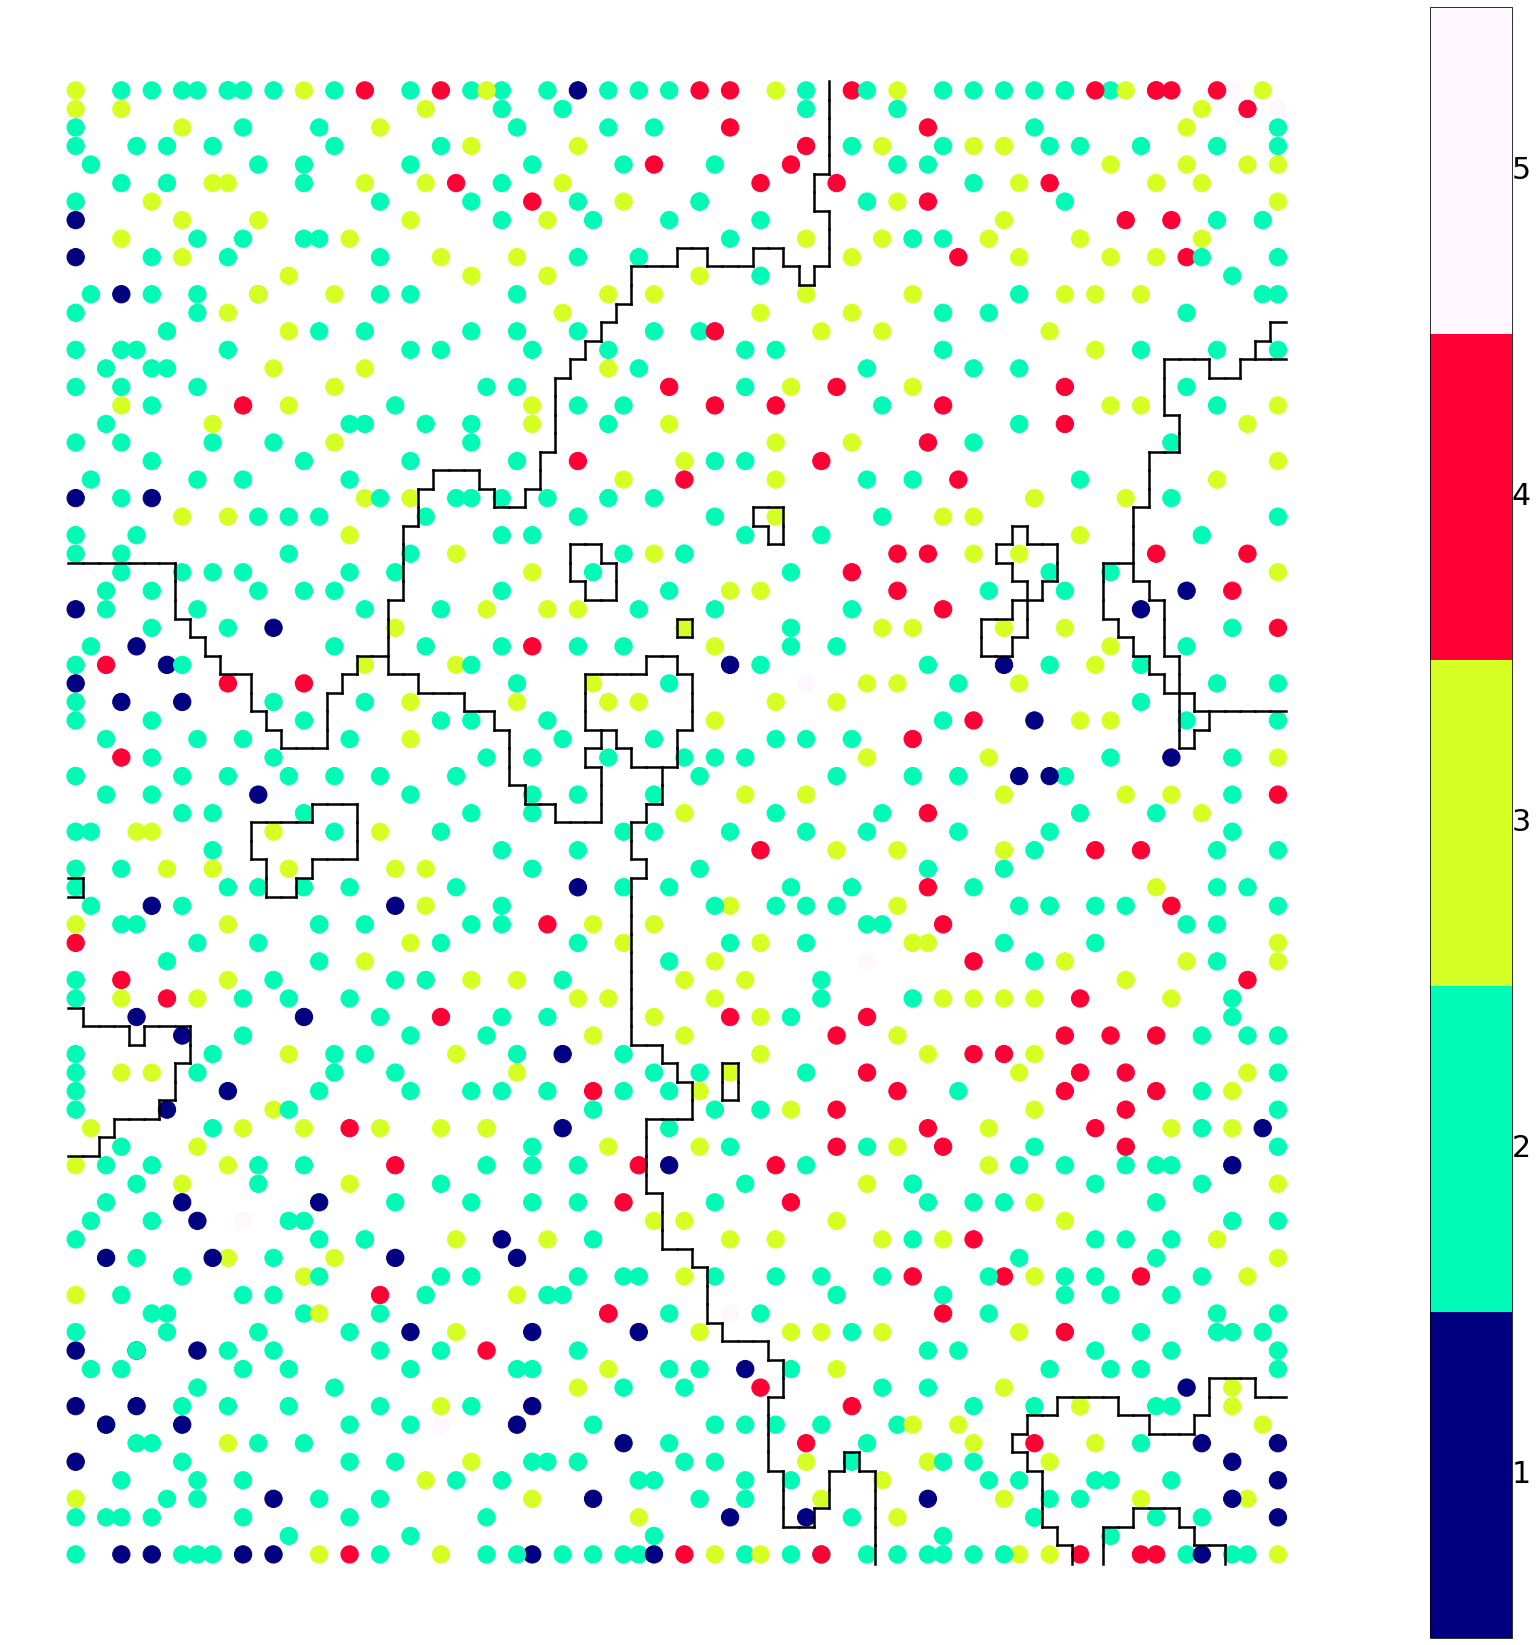

In [122]:
clusteringmap_category(sm,4,data2,"n5aRing34_Categ",'./Images/descriptors/Mw_HOMO/linear_Categ2.png')

locator: <matplotlib.ticker.FixedLocator object at 0x00000253D339FBA8>
Using fixed locator on colorbar
Setting pcolormesh


array([0, 0, 0, ..., 2, 2, 2])

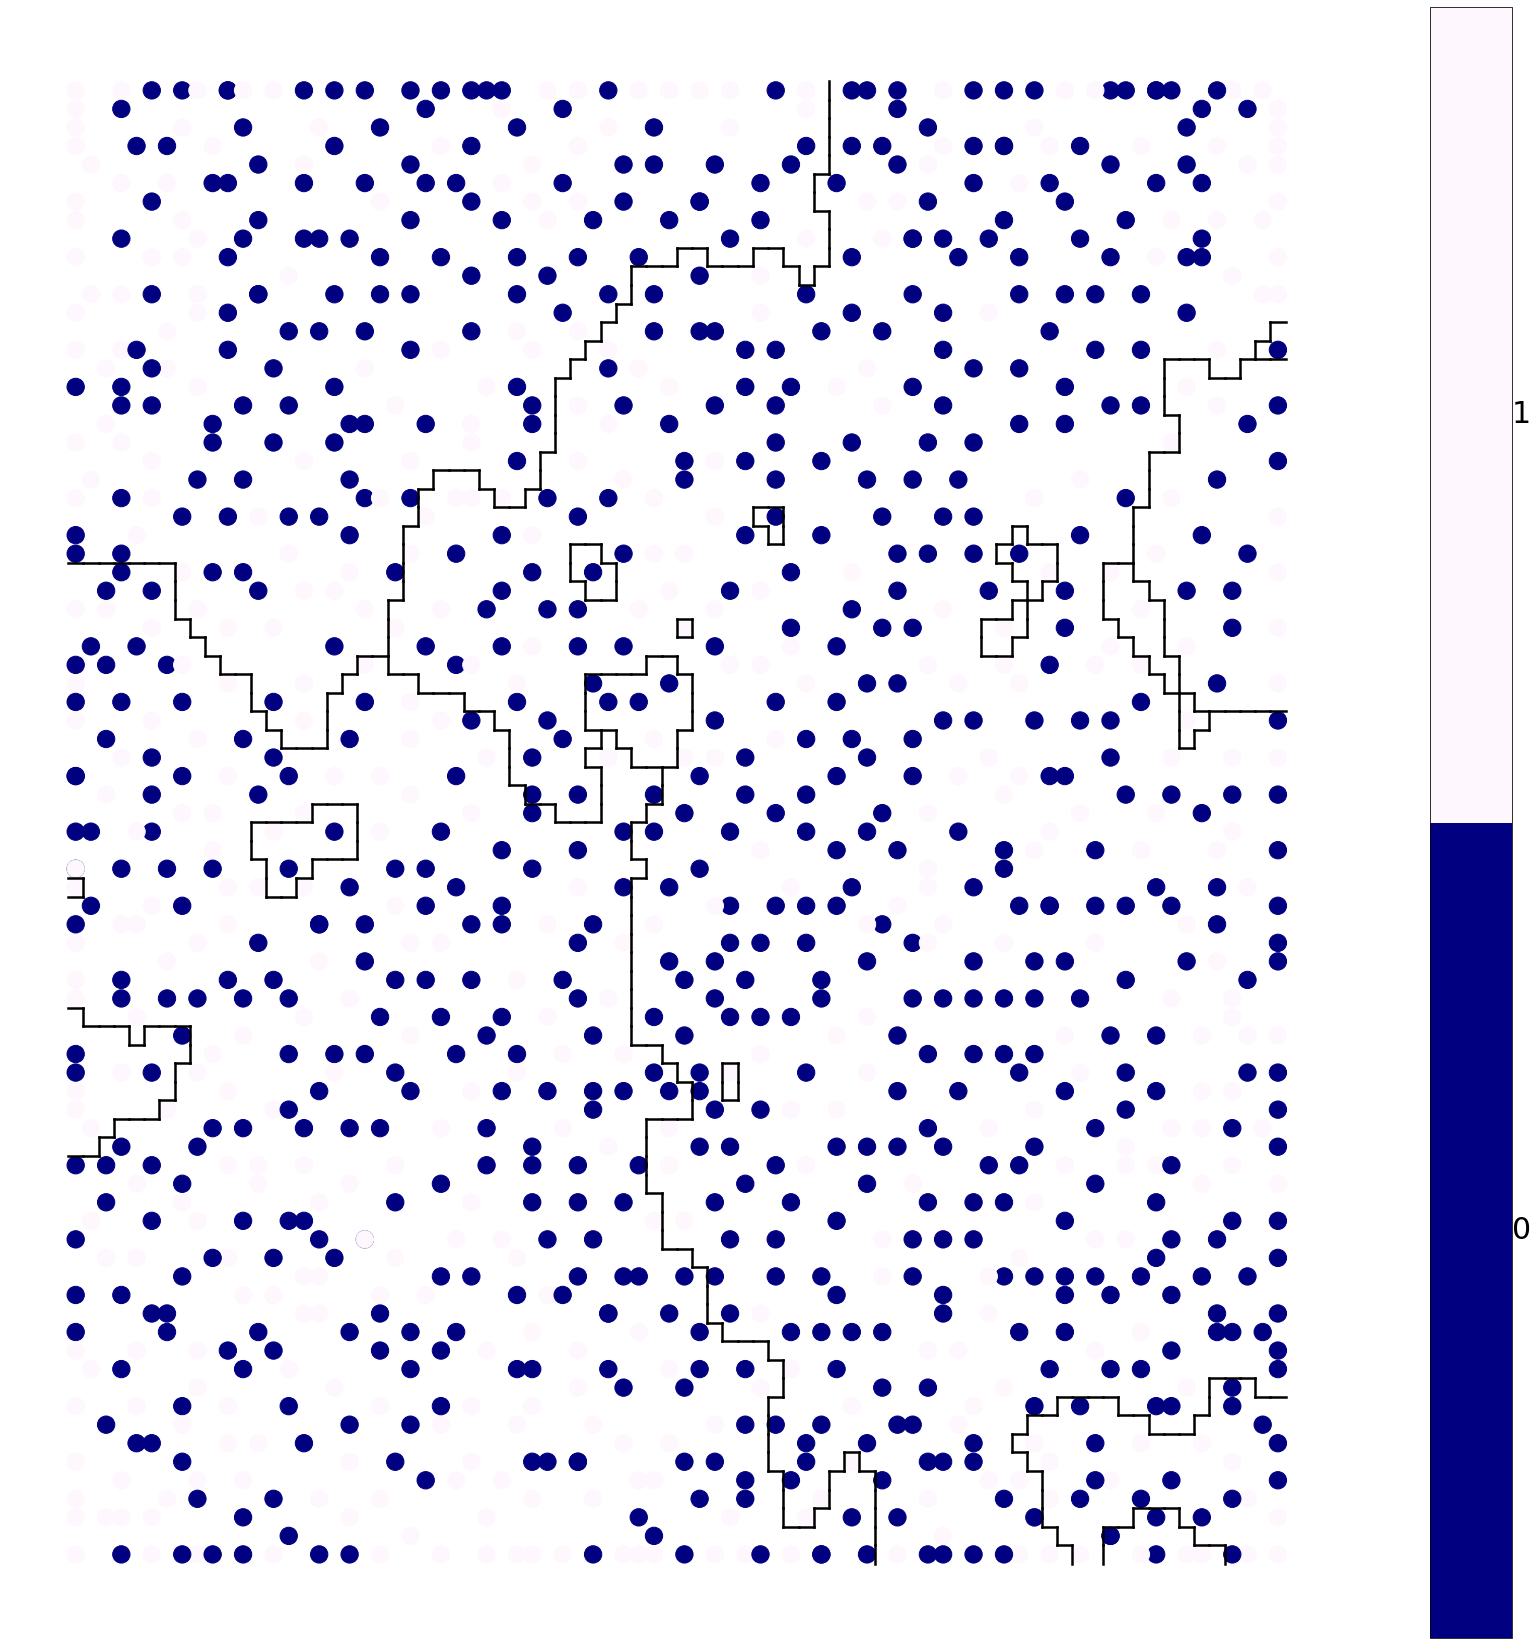

In [94]:
clusteringmap_category(sm,4,data2,"branch_linear_34",'./Images/descriptors/Mw_HOMO/linear_Categ2.png')

locator: <matplotlib.ticker.FixedLocator object at 0x00000253D67A8DD8>
Using fixed locator on colorbar
Setting pcolormesh


array([0, 0, 0, ..., 2, 2, 2])

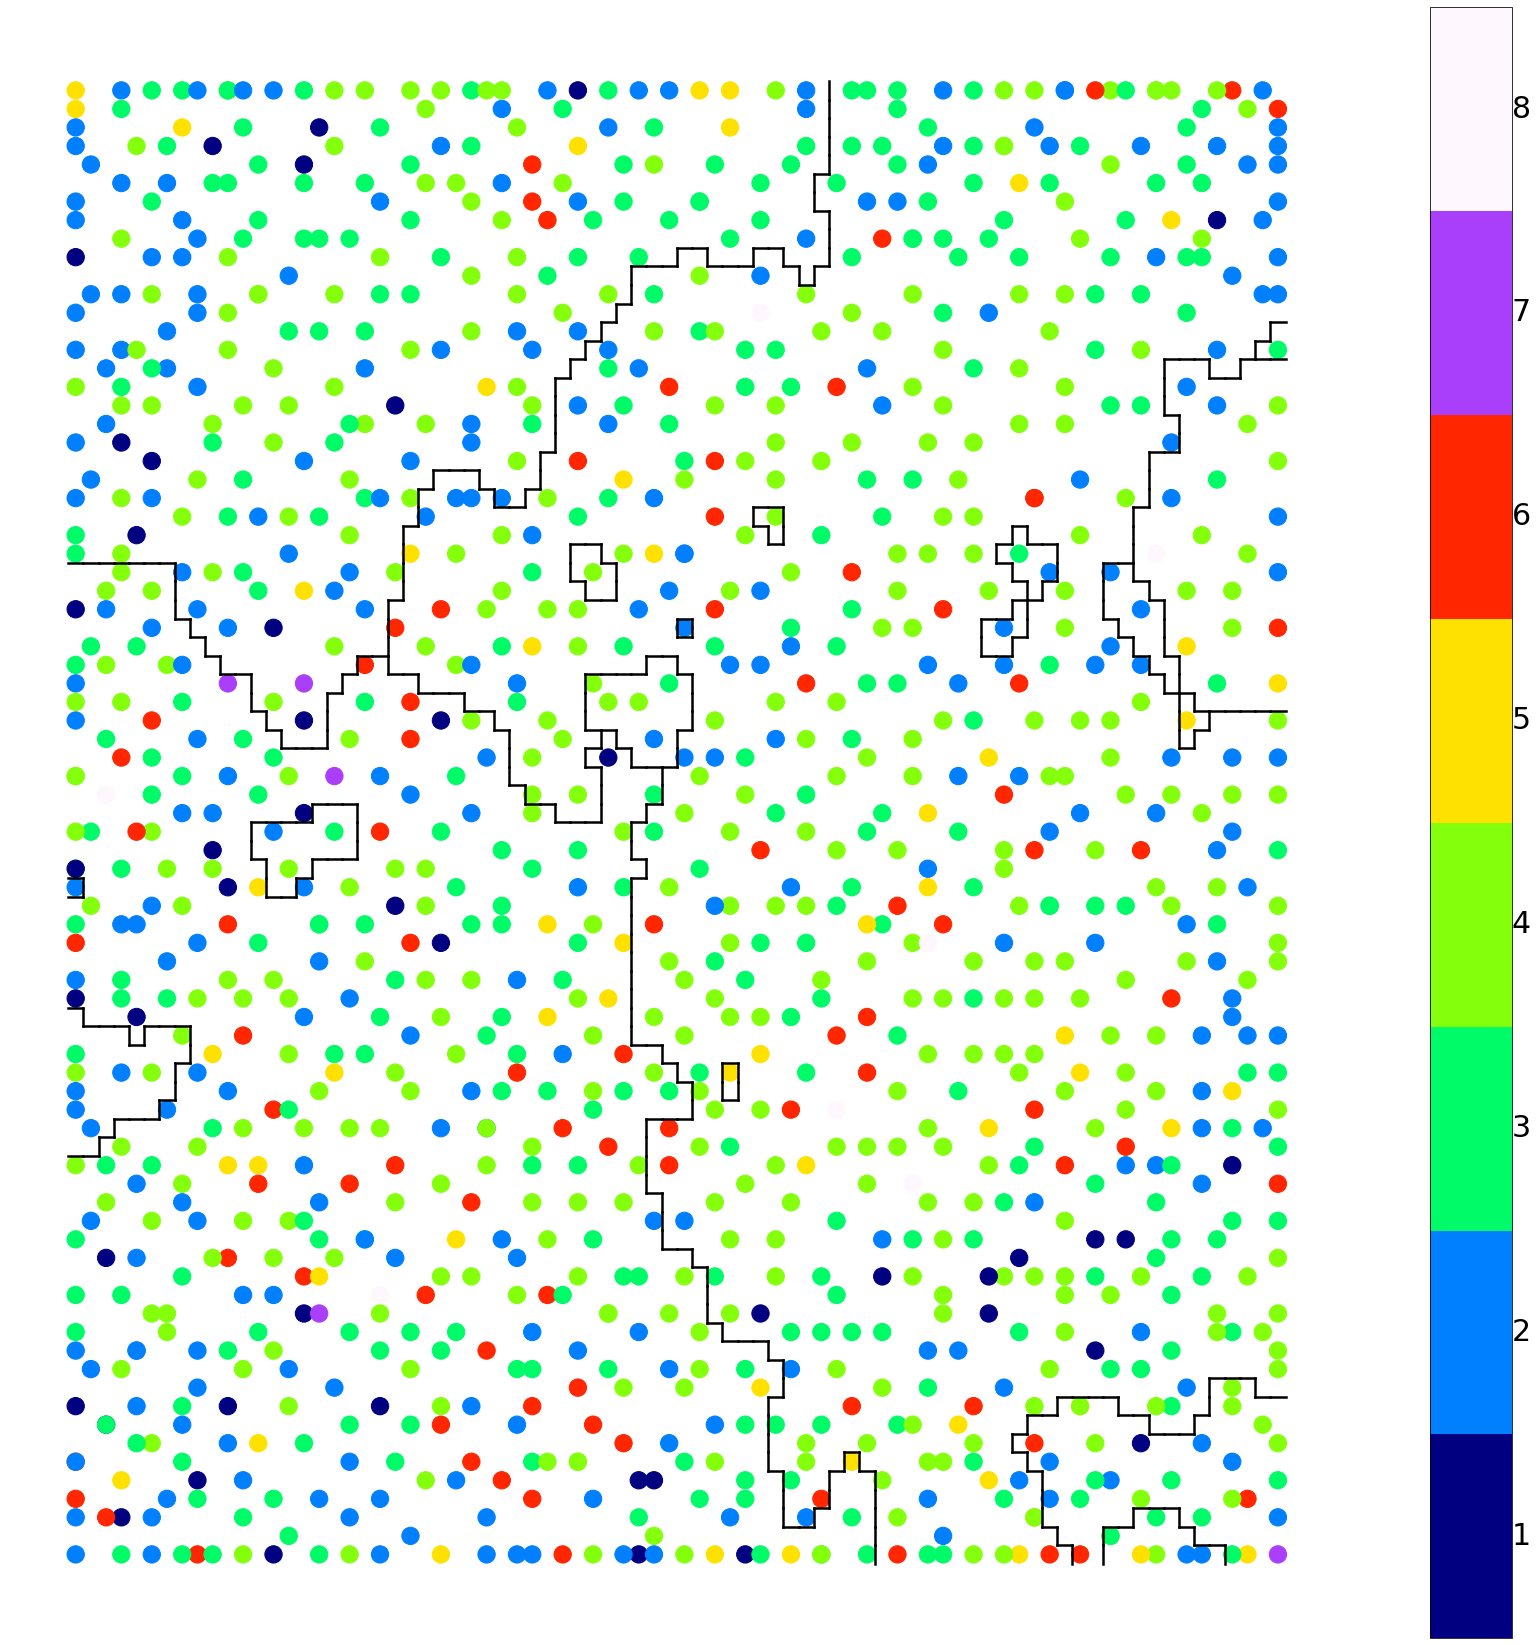

In [97]:
clusteringmap_category(sm,4,data2,"sum",'./Images/descriptors/Mw_HOMO/branch_Categ2.png')

locator: <matplotlib.ticker.FixedLocator object at 0x00000253AE15E8D0>
Using fixed locator on colorbar
Setting pcolormesh


array([0, 0, 0, ..., 2, 2, 2])

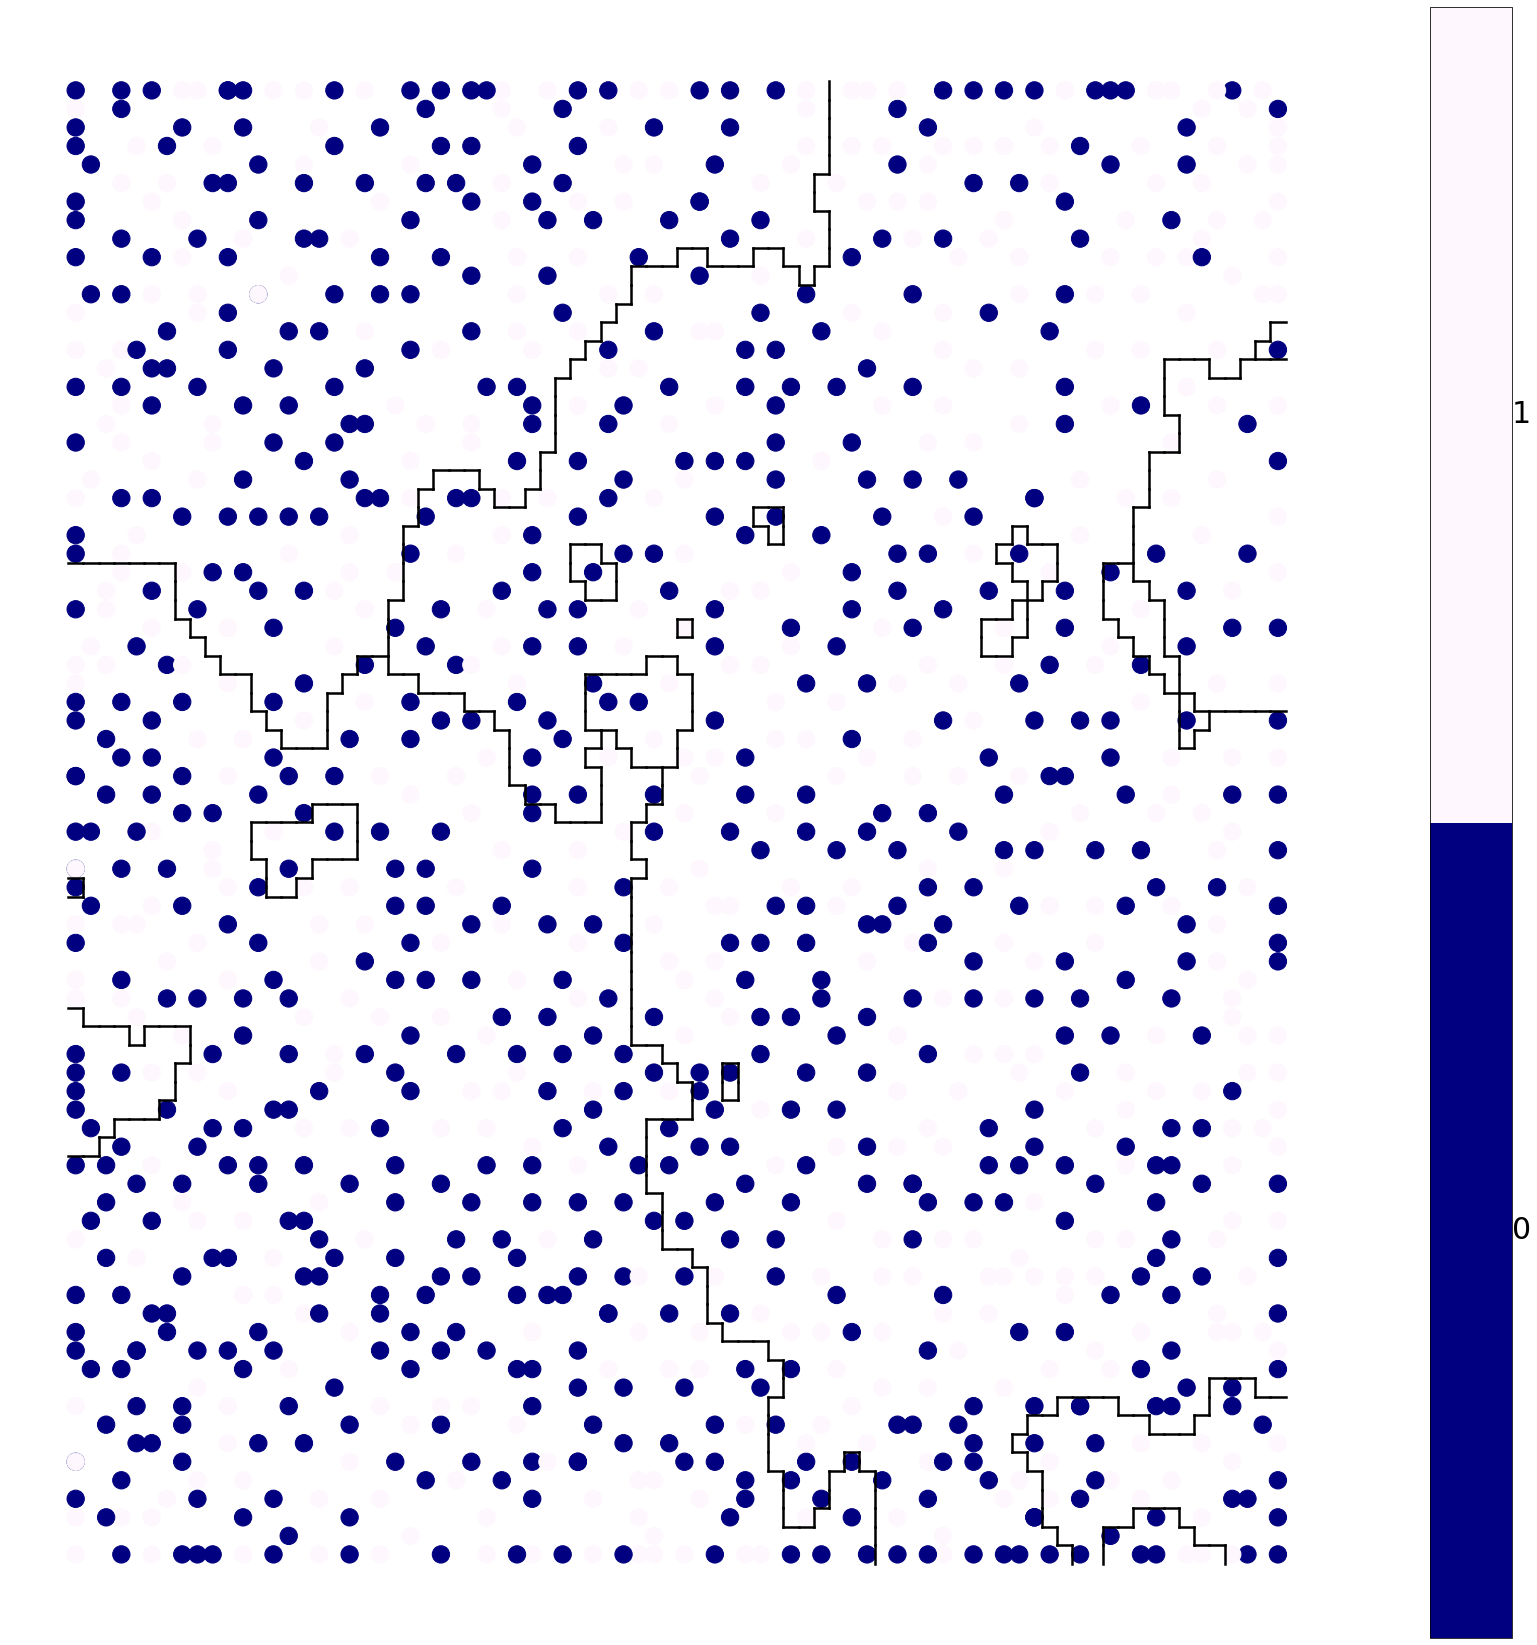

In [34]:
clusteringmap_category(sm,4,data2,"linear_Categ2",'./Images/descriptors/Mw_HOMO/linear_Categ2.png')

locator: <matplotlib.ticker.FixedLocator object at 0x00000253AE416BE0>
Using fixed locator on colorbar
Setting pcolormesh


array([0, 0, 0, ..., 2, 2, 2])

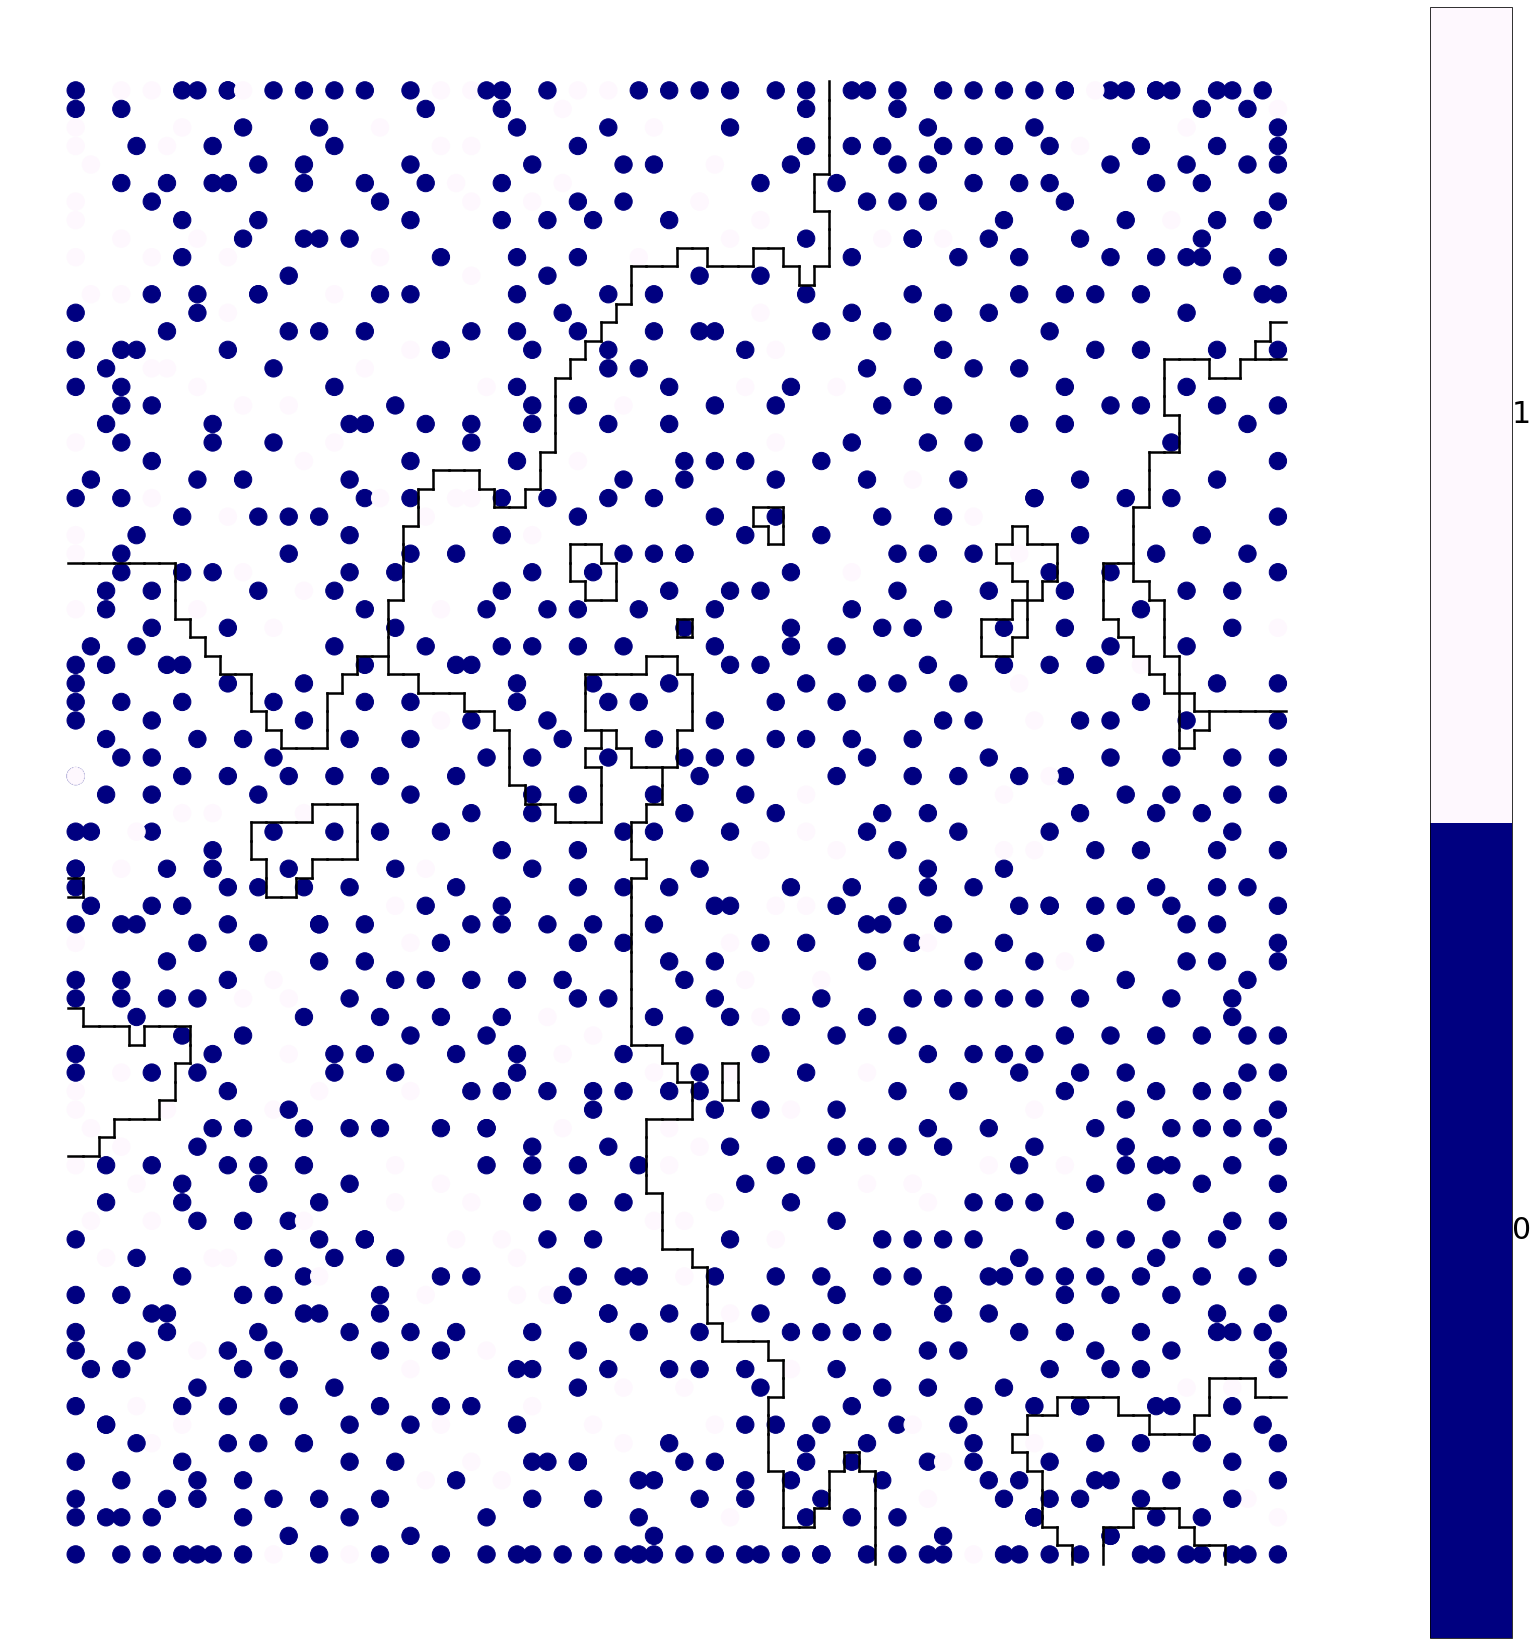

In [35]:
clusteringmap_category(sm,4,data2,"branch_Categ2",'./Images/descriptors/Mw_HOMO/branch_Categ2.png')

locator: <matplotlib.ticker.FixedLocator object at 0x00000253D6C6AB70>
Using fixed locator on colorbar
Setting pcolormesh
locator: <matplotlib.ticker.FixedLocator object at 0x00000253D8A03DD8>
Using fixed locator on colorbar
Setting pcolormesh


array([0, 0, 0, ..., 2, 2, 2])

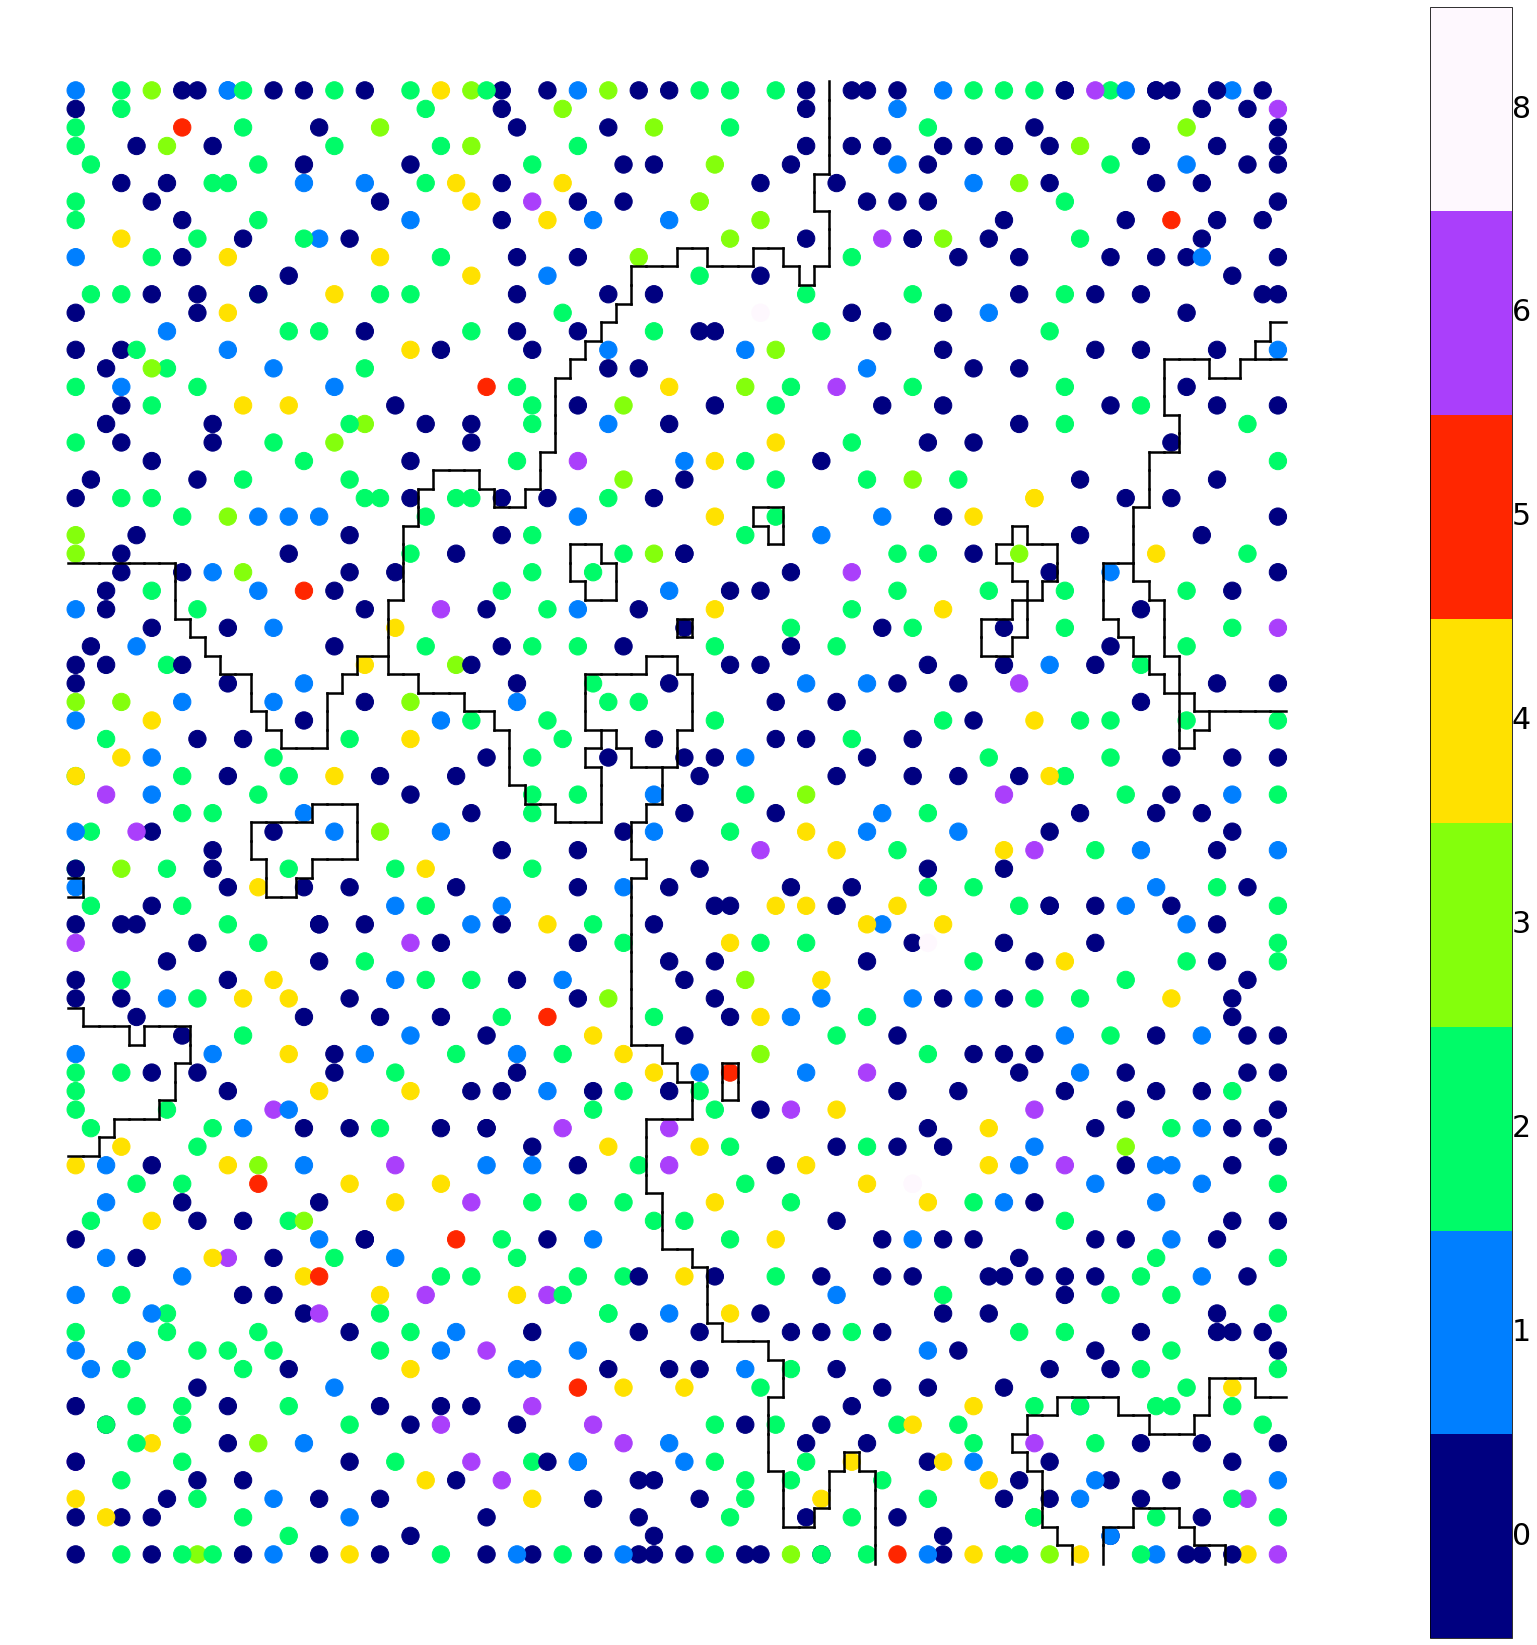

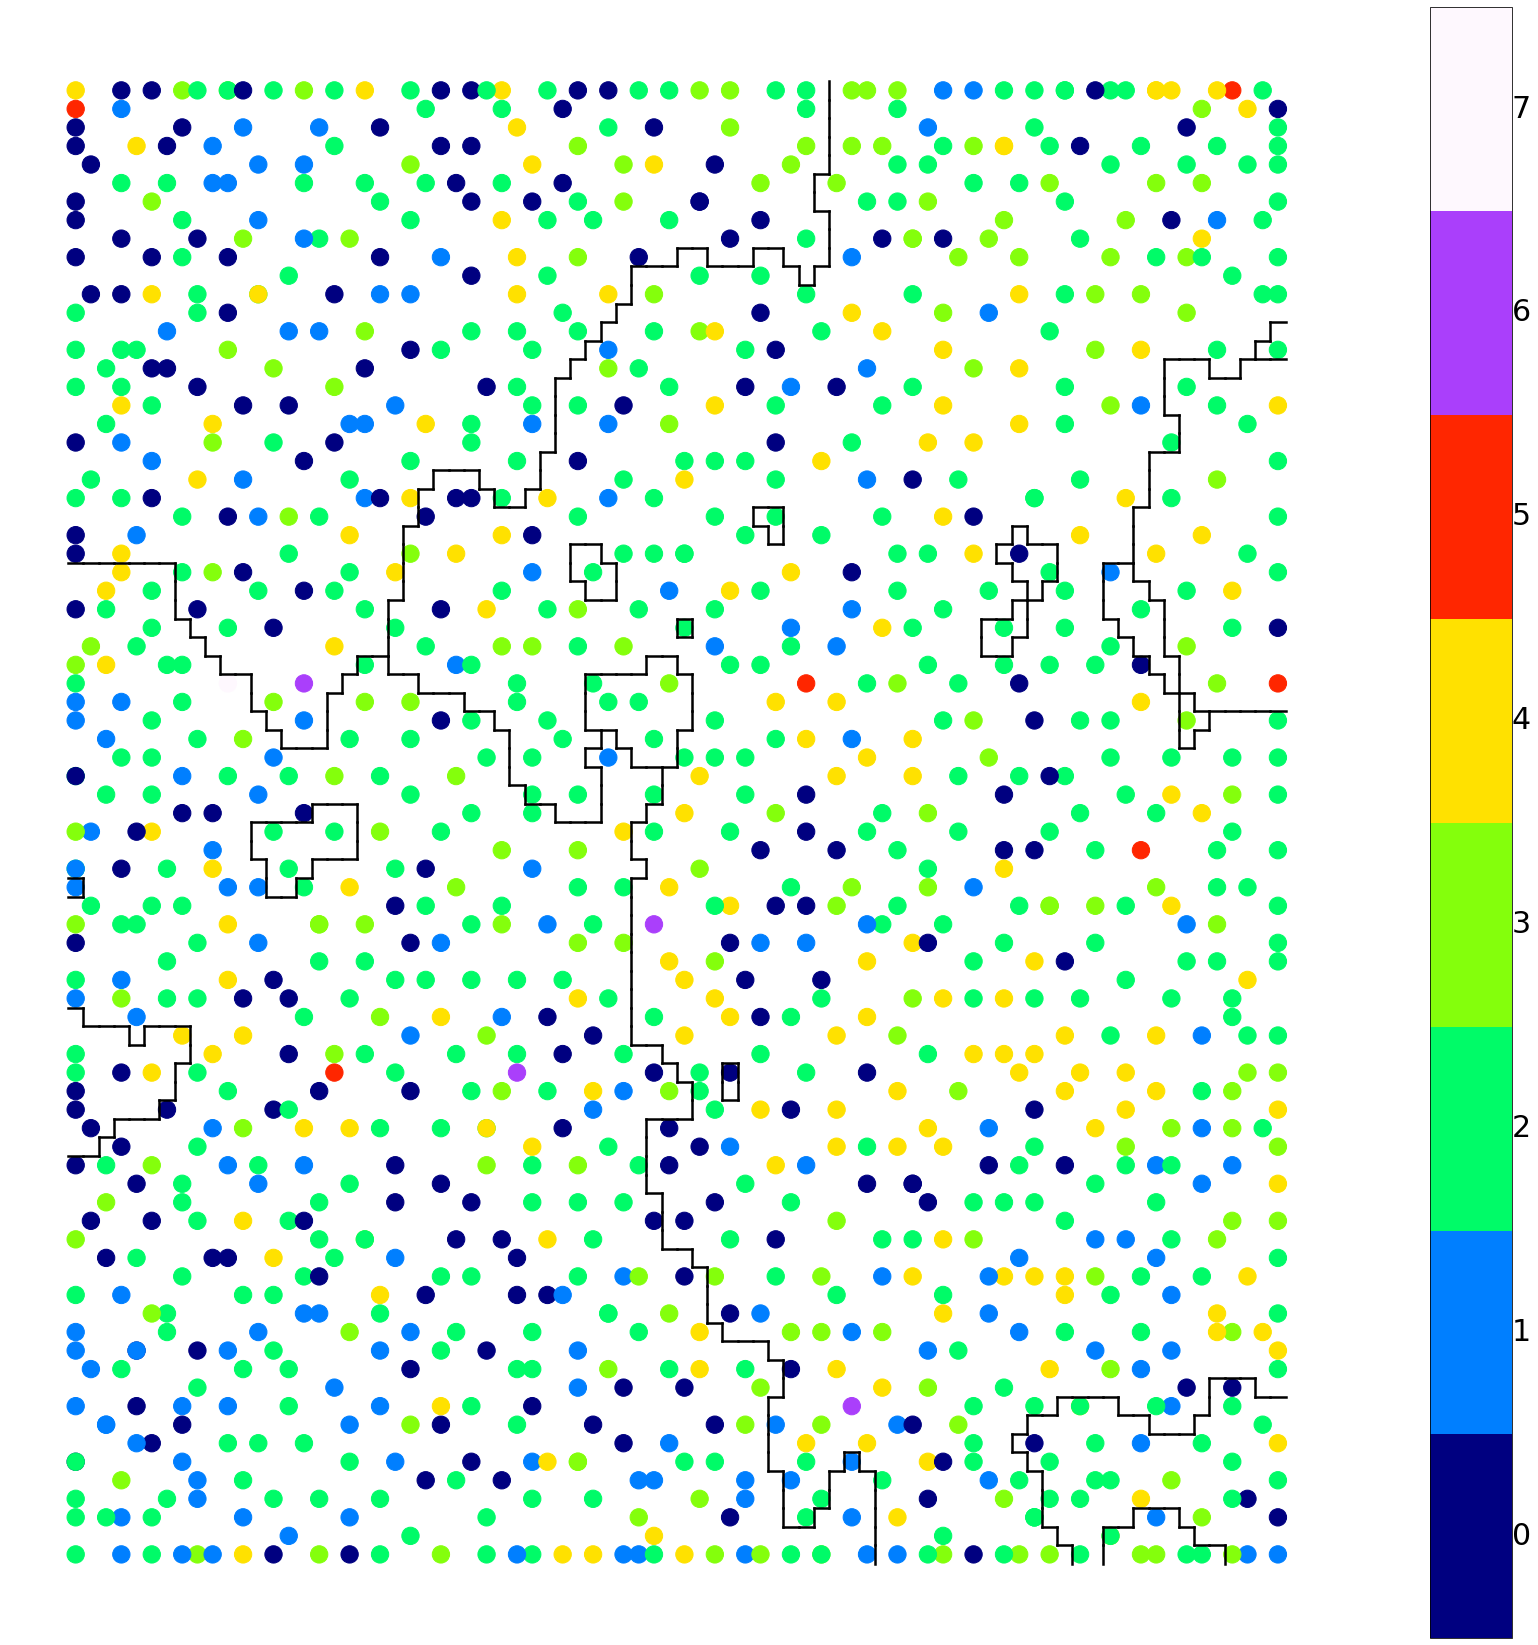

In [92]:
data2['linear_Categ3'] = classify_by_group(data2,"linear",5)
clusteringmap_category(sm,4,data2,"linear",'./Images/descriptors/Mw_HOMO/linear_Categ3.png')

data2['branch_Categ3'] = classify_by_group(data2,"branch",5)
clusteringmap_category(sm,4,data2,"branch",'./Images/descriptors/Mw_HOMO/branch_Categ3.png')

In [41]:
linear = data2['linear']
branch = data2['branch']

In [60]:
sum_a = linear + branch # sum_a ranges between 1 - 8

In [115]:
import numpy as np
Sum = data2['linear'] + data2['branch']
bol1 = Sum >= 2
bol2 = Sum <= 4
newArr = data2[bol1 & bol2]

In [160]:
import numpy as np
prop = data2['n5aRing']
bol1 = (prop >= 3)
bol2 = (prop <= 7)
newArr = data2[bol1 & bol2]

In [161]:
len(newArr) / 1203

0.830423940149626